### Simulation Results about Rank in partial selectivity

1. About the input data

 - independent binary elements:  
 
    $p\left(x_{i}^{\mu}=1\right)=1 / 2, \quad p\left(x_{i}^{\mu}=-1\right)=1 / 2$

 - outputs are chosen randomly:

    $p\left(y^{\mu}=1\right)=1 / 2, \quad p\left(y^{\mu}=-1\right)=1 / 2$

 - Stimuli modality: 

    Dimension N, independent patterns P 

 - Context modality:

    Dimension M, independent patterns K

2. About the normalized the random connection matrix:

   $J  \sim \mathcal{N}\left(0, \frac{1}{\mathcal{M} N_{m o d}}\right)$
   
   The matrix $J^i$ projects input in a single modality $i$ to a vector in mixed layer with length $N_c/\mathcal{P}$,
   and mix with other modality projections, then pass a threshold.
   
   $\mathcal{P}$ is the partition number 
   
3. The partial mixing example: $N_m = 3$ , $\mathcal{M} = 2$, $\mathcal{P} = 2$

    set stimuli modality is $\epsilon$, two contexts modality is $\eta$ and $\sigma$

    So for a input like $\xi_\mu = \{\epsilon_i,\eta_j,\sigma_k\}$, the response on cortical layer is
    
    $\left[\begin{array}{c}
    sign(J^\epsilon\epsilon_i+J^\eta\eta_j-\theta) \\
    sign(J^\epsilon\epsilon_i+J^\sigma\sigma_j-\theta)
    \end{array}\right]$
    
    keep the sparsity on the cortical layer is $f=0.5$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

In [4]:
class rank_test_nm3(object):
    
    def __init__(self,N,M,P,K,Nc):
        self.dim_stimuli = int(N)
        self.dim_context = int(M)
        self.num_sti_sample = int(P)
        self.num_con_sample = int(K)
        self.dim_cortical = int(Nc)
        
    def generate_input(self,P,N):
        matrix = np.sign(np.random.randn(P,N))
        return matrix
            
    
    def fix_sparsity(self,v,f=0.5):
        
        threshold = np.sort(v)[int((1-f)*v.size)]
        
        exite = v >= threshold
        inhibit = v < threshold
        
        v[exite] = 1
        v[inhibit] = 0
        
        return v
    
    
    def order_1(self,f=0.5):
        
        P = self.num_sti_sample
        K = self.num_con_sample
        N = self.dim_stimuli
        Nc = self.dim_cortical
        M = self.dim_context
        
        dim_order1 = int(Nc/3)
        J_sti = np.random.normal(0,1/np.sqrt(N),size=(dim_order1,N))
        J_con1 = np.random.normal(0,1/np.sqrt(M),size=(dim_order1,M))
        J_con2 = np.random.normal(0,1/np.sqrt(M),size=(dim_order1,M))
        
        sti_data = self.generate_input(P,N)
        con1_data = self.generate_input(K,M)
        con2_data = self.generate_input(K,M)
        
        mix_layer_data = np.zeros((P*K*K,Nc))
        
        l = 0
        
        for i in range(P): 
            
            for j in range(K): 
                
                for k in range(K):
                    
                    h_ijk = np.concatenate((self.fix_sparsity(np.matmul(J_sti,sti_data[i]),f),self.fix_sparsity(np.matmul(J_con1,con1_data[j]),f),self.fix_sparsity(np.matmul(J_con2,con2_data[k]),f)))
                    #mix_layer_data[l,:] = self.fix_sparsity(h_ijk)
                    mix_layer_data[l,:] = h_ijk
                    l = l + 1
        
        return mix_layer_data
    
    def order_2(self,f=0.5):
        
        P = self.num_sti_sample
        K = self.num_con_sample
        N = self.dim_stimuli
        Nc = self.dim_cortical
        M = self.dim_context
        
        dim_order2 = int(Nc/3)
        J_sti = np.random.normal(0,1/np.sqrt(N),size=(dim_order2,N))
        J_con1 = np.random.normal(0,1/np.sqrt(M),size=(dim_order2,M))
        J_con2 = np.random.normal(0,1/np.sqrt(M),size=(dim_order2,M))
        
        sti_data = self.generate_input(P,N)
        con1_data = self.generate_input(K,M)
        con2_data = self.generate_input(K,M)
        
        mix_layer_data = np.zeros((P*K*K,Nc))
        
        l = 0
        
        for i in range(P): 
            
            for j in range(K): 
                
                for k in range(K):
                    
                    h_ijk = np.concatenate((self.fix_sparsity(np.matmul(J_sti,sti_data[i])+np.matmul(J_con1,con1_data[j]),f),
                                            self.fix_sparsity(np.matmul(J_sti,sti_data[i])+np.matmul(J_con2,con2_data[k]),f),
                                            self.fix_sparsity(np.matmul(J_con1,con1_data[j])+np.matmul(J_con2,con2_data[k]),f)))
                    #mix_layer_data[l,:] = self.fix_sparsity(h_ijk)
                    mix_layer_data[l,:] = h_ijk
                    l = l + 1
        
        return mix_layer_data
    
    def order_3(self,f=0.5):
        
        P = self.num_sti_sample
        K = self.num_con_sample
        N = self.dim_stimuli
        Nc = self.dim_cortical
        M = self.dim_context
        
        dim_order3 = int(Nc)
        J_sti = np.random.normal(0,1/np.sqrt(N),size=(dim_order3,N))
        J_con1 = np.random.normal(0,1/np.sqrt(M),size=(dim_order3,M))
        J_con2 = np.random.normal(0,1/np.sqrt(M),size=(dim_order3,M))
        
        sti_data = self.generate_input(P,N)
        con1_data = self.generate_input(K,M)
        con2_data = self.generate_input(K,M)
        
        mix_layer_data = np.zeros((P*K*K,Nc))
        
        l = 0
        
        for i in range(P): 
            
            for j in range(K): 
                
                for k in range(K):
                    
                    h_ijk = self.fix_sparsity(np.matmul(J_sti,sti_data[i])+np.matmul(J_con1,con1_data[j])+np.matmul(J_con2,con2_data[k]),f)
                    #mix_layer_data[l,:] = self.fix_sparsity(h_ijk)
                    mix_layer_data[l,:] = h_ijk
                    l = l + 1
        
        return mix_layer_data

In [5]:
Klist = np.linspace(1,10,10)
N = 100
M = 100
P = 50
Nc = 6000
rk1 = []
rk2 = []
rk3 = []
f=0.5

for K in Klist:
    model_K = rank_test_nm3(N,M,P,K,Nc)
    mtx_order1 = model_K.order_1(f)
    mtx_order2 = model_K.order_2(f)
    mtx_order3 = model_K.order_3(f)
    
    rk1.append(np.linalg.matrix_rank(mtx_order1))
    rk2.append(np.linalg.matrix_rank(mtx_order2))
    rk3.append(np.linalg.matrix_rank(mtx_order3))

In [6]:
print(rk1)
print(rk2)
print(rk3)

[50, 52, 54, 56, 58, 60, 62, 64, 66, 68]
[50, 151, 254, 359, 466, 575, 686, 799, 914, 1031]
[50, 200, 450, 800, 1250, 1800, 2450, 3200, 4050, 5000]


In [7]:
from IPython import display
display.set_matplotlib_formats('svg')

In [71]:
P = 50

def pred1(K):
    
    return P+2*K-2 

def pred2(K):
    
    return K**2+(P-1)*(2*K-1)

def pred3(K):
    
    return P*K*K

def pred_wrong(K):
    
    return K*(P-1+K)

In [78]:
rk2.

[50, 151, 254, 359, 466, 575, 686, 799, 914, 1031]

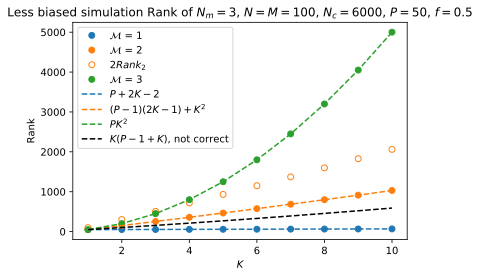

In [82]:
plt.plot(Klist,rk1,'o',color = 'tab:blue',label=r'$\mathcal{M}$ = 1')
plt.plot(Klist,rk2,'o',color = 'tab:orange',label=r'$\mathcal{M}$ = 2')
plt.plot(Klist,[i*2 for i in rk2],'o',mec = 'tab:orange',mfc='white',label=r'2$Rank_2$')
plt.plot(Klist,rk3,'o',color = 'tab:green',label=r'$\mathcal{M}$ = 3')

plt.plot(Klist,pred1(Klist),'--',color = 'tab:blue',label = r'$P+2K-2$')
plt.plot(Klist,pred2(Klist),'--',color = 'tab:orange',label = r'$(P-1)(2K-1)+K^2$')
plt.plot(Klist,pred3(Klist),'--',color = 'tab:green',label = r'$PK^2$')
plt.plot(Klist,pred_wrong(Klist),'--',color = 'black',label = r'$K(P-1+K)$, not correct')

plt.title(r'Less biased simulation Rank of $N_m = 3$, $N=M =100$, $N_c = 6000$, $P=50$, $f=0.5$')
plt.xlabel(r'$K$')
plt.ylabel('Rank')
plt.legend()

plt.show()

1. limit of P,K, when $\mathcal{M} = 1$

In [ ]:
def limit_1(K):
    return (4*K-4)/(K**2-2)

plt.plot(Klist,limit_1(Klist),'.--')
pl

### Effected by the sparseness on the cortical layer

In [58]:
K = 10
N = 100
M = 100
P = 50
Nc = 6000
rk1_f = []
rk2_f = []
rk3_f = []
flist = 10**np.linspace(-3,0,20)

for f in flist:
    model_K = rank_test_nm3(N,M,P,K,Nc)
    mtx_order1 = model_K.order_1(f)
    mtx_order2 = model_K.order_2(f)
    mtx_order3 = model_K.order_3(f)
    
    rk1_f.append(np.linalg.matrix_rank(mtx_order1))
    rk2_f.append(np.linalg.matrix_rank(mtx_order2))
    rk3_f.append(np.linalg.matrix_rank(mtx_order3))

In [59]:
print(rk1_f)
print(rk2_f)
print(rk3_f)

[68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 1]
[901, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1031, 1]
[2900, 3461, 3968, 4204, 4654, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 1]


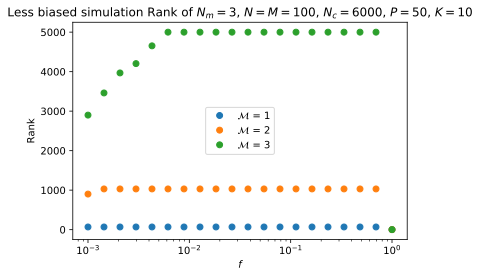

In [60]:
plt.plot(flist,rk1_f,'o',color = 'tab:blue',label=r'$\mathcal{M}$ = 1')
plt.plot(flist,rk2_f,'o',color = 'tab:orange',label=r'$\mathcal{M}$ = 2')
plt.plot(flist,rk3_f,'o',color = 'tab:green',label=r'$\mathcal{M}$ = 3')

plt.title(r'Less biased simulation Rank of $N_m = 3$, $N=M =100$, $N_c = 6000$, $P=50$, $K=10$')
plt.xlabel(r'$f$')
plt.ylabel('Rank')
plt.xscale('log')
plt.legend()

plt.show()

### Sparseness effect, smaller 

In [ ]:
K = 10
N = 100
M = 100
P = 50
Nc = 6000
rk1_f = []
rk2_f = []
rk3_f = []
flist = 10**np.linspace(-3,0,20)

for f in flist:
    model_K = rank_test_nm3(N,M,P,K,Nc)
    mtx_order1 = model_K.order_1(f)
    mtx_order2 = model_K.order_2(f)
    mtx_order3 = model_K.order_3(f)
    
    rk1_f.append(np.linalg.matrix_rank(mtx_order1))
    rk2_f.append(np.linalg.matrix_rank(mtx_order2))
    rk3_f.append(np.linalg.matrix_rank(mtx_order3))